In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Initial Data Preparation

### Pick a real-world directed network dataset (with number of nodes > 100)

In [2]:
# # The dataset used is Wikipedia vote network from the link https://snap.stanford.edu/data/wiki-Vote.html
# # Dataset statistics as per the source of the data:
# Dataset statistics
# Nodes:7115
# Edges:103689
# Nodes in largest WCC:7066 (0.993)
# Edges in largest WCC:103663 (1.000)
# Nodes in largest SCC:1300 (0.183)
# Edges in largest SCC:39456 (0.381)
# Average clustering coefficient:0.1409
# Number of triangles:608389
# Fraction of closed triangles:0.04564
# Diameter (longest shortest path):7
# 90-percentile effective diameter:3.8

In [3]:
#Load the dataset into memory
df=pd.read_excel(r"C:\Users\neha1\Downloads\Wiki-Vote.xlsx")
df

,FromNodeId,ToNodeId
0,30,1412
1,30,3352
2,30,5254
3,30,5543
4,30,7478
...,...,...
103684,8272,4940
103685,8273,4940
103686,8150,8275
103687,8150,8276


In [4]:
# The number of rows in the dataframe correspond to the number of edges as per the given statistics. 
# number of connections/edges
df.shape[0] 

103689

In [5]:
#finding unique values in dataframe
def find_unique_df(df, column):
    unique_element = []
    for index, row in df.iterrows():
        value = row[column]
        if value not in unique_element:
            unique_element.append(value)
    return unique_element

In [6]:
# finding unique nodes in FromNodeId and ToNodeId
FromNodeId = find_unique_df(df,'FromNodeId')
ToNodeId = find_unique_df(df, 'ToNodeId')

In [7]:
len(FromNodeId), len(ToNodeId)

(6110, 2381)

In [8]:
# concatenating FromNodeId and ToNodeId to find complete set of nodes
nodes = np.concatenate((FromNodeId, ToNodeId))

In [9]:
# creating duplicate columns for FromNodeId and ToNodeId 
df['FromNodeId1'] = df['FromNodeId']
df['ToNodeId1'] = df['ToNodeId']

In [10]:
#finding unique values in array
def find_unique_arr(arr):
    unique_element = []
    for value in arr:
        if value not in unique_element:
            unique_element.append(value)
    return unique_element

In [11]:
min(df['FromNodeId']), min(df['ToNodeId']), max(df['FromNodeId']),max(df['ToNodeId'])

(3, 3, 8274, 8297)

In [12]:
# For a total of 7115 nodes in the dataset, the node IDs range from 3 to 8297. Therefore, some nodesare not represented in 
# the data and so we will be creating new ids for the source and the target ranging from 0 to 7114.

# creating a dictionary to assign unique id to each node 
unique_nodes = find_unique_arr(nodes)
for i in nodes:
    val_dict = {value:idx for idx, value in enumerate(unique_nodes)}

In [13]:
val_dict

{30: 0,
 3: 1,
 25: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 54: 24,
 28: 25,
 33: 26,
 34: 27,
 36: 28,
 35: 29,
 37: 30,
 38: 31,
 39: 32,
 40: 33,
 26: 34,
 41: 35,
 42: 36,
 43: 37,
 44: 38,
 45: 39,
 46: 40,
 47: 41,
 48: 42,
 49: 43,
 50: 44,
 51: 45,
 52: 46,
 53: 47,
 29: 48,
 55: 49,
 56: 50,
 57: 51,
 58: 52,
 59: 53,
 60: 54,
 62: 55,
 27: 56,
 63: 57,
 64: 58,
 65: 59,
 66: 60,
 72: 61,
 73: 62,
 75: 63,
 76: 64,
 78: 65,
 79: 66,
 77: 67,
 80: 68,
 81: 69,
 83: 70,
 91: 71,
 67: 72,
 84: 73,
 85: 74,
 86: 75,
 71: 76,
 87: 77,
 88: 78,
 89: 79,
 90: 80,
 93: 81,
 92: 82,
 82: 83,
 94: 84,
 95: 85,
 99: 86,
 96: 87,
 100: 88,
 98: 89,
 31: 90,
 102: 91,
 103: 92,
 115: 93,
 116: 94,
 104: 95,
 105: 96,
 106: 97,
 68: 98,
 117: 99,
 118: 100,
 119: 101,
 107: 102,
 108: 103,
 109: 104,
 110: 105,
 111: 106,
 120: 107,
 112: 108,
 121: 109

In [14]:
# Mapping the newly assigned ids to the earlier given node ids in the network
df['FromNodeId1'] = df['FromNodeId'].map(val_dict)
df['ToNodeId1'] = df['ToNodeId'].map(val_dict)

# Question 1 : Link Analysis

## Represent the network in terms of its adjacency matrix as well as edge list.

In [15]:
# Finding the total number of nodes
n_nodes = 0
all_nodes = find_unique_arr(nodes)
for i in all_nodes:
    n_nodes=n_nodes+1
print(n_nodes)

# Create a matrix of shape n_nodes x n_nodes filled with 0s
ad_matrix = np.zeros((n_nodes, n_nodes))

7115


### Printing the adjacency matrix

In [16]:
for i in range(0, df.shape[0]):
    source = df.loc[i]['FromNodeId1']
    target = df.loc[i]['ToNodeId1']
    ad_matrix[source][target] = 1  

print(ad_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Printing the edge list

In [17]:
edge_list = df[['FromNodeId1', 'ToNodeId1']].values.tolist()
print(edge_list)

[[0, 6110], [0, 2716], [0, 4124], [0, 4314], [0, 6111], [1, 25], [1, 0], [1, 32], [1, 24], [1, 103], [1, 137], [1, 159], [1, 163], [1, 6112], [1, 6113], [1, 6114], [1, 6115], [1, 302], [1, 305], [1, 322], [1, 463], [1, 6116], [1, 479], [1, 481], [1, 484], [1, 496], [1, 6117], [1, 6118], [2, 1], [2, 5], [2, 7], [2, 18], [2, 22], [2, 25], [2, 48], [2, 0], [2, 26], [2, 29], [2, 44], [2, 24], [2, 49], [2, 63], [2, 68], [2, 75], [2, 84], [2, 117], [2, 137], [2, 139], [2, 163], [2, 188], [2, 6112], [2, 197], [2, 199], [2, 207], [2, 6119], [2, 224], [2, 221], [2, 226], [2, 6113], [2, 238], [2, 243], [2, 244], [2, 6114], [2, 6120], [2, 6115], [2, 261], [2, 265], [2, 267], [2, 270], [2, 6121], [2, 354], [2, 296], [2, 302], [2, 305], [2, 306], [2, 6122], [2, 314], [2, 6123], [2, 322], [2, 6124], [2, 6125], [2, 6126], [2, 346], [2, 352], [2, 6127], [2, 6128], [2, 371], [2, 404], [2, 6129], [2, 441], [2, 447], [2, 450], [2, 484], [2, 485], [2, 495], [2, 496], [2, 6117], [2, 530], [2, 532], [2, 540

## Briefly describe the dataset chosen and report the following:

In [18]:
# Wikipedia is a free encyclopedia written collaboratively by volunteers around the world. A small part of Wikipedia 
# contributors are administrators, who are users with access to additional technical features that aid in maintenance. 
# In order for a user to become an administrator a Request for adminship (RfA) is issued and the Wikipedia community via 
# a public discussion or a vote decides who to promote to adminship. Using the latest complete dump of Wikipedia page edit 
# history (from January 3 2008) we extracted all administrator elections and vote history data. This gave us 2,794 elections
# with 103,663 total votes and 7,066 users participating in the elections (either casting a vote or being voted on). Out of
# these 1,235 elections resulted in a successful promotion, while 1,559 elections did not result in the promotion. About half 
# of the votes in the dataset are by existing admins, while the other half comes from ordinary Wikipedia users.

# The network contains all the Wikipedia voting data from the inception of Wikipedia till January 2008. Nodes in the network 
# represent wikipedia users and a directed edge from node i to node j represents that user i voted on user j.

### 1. Number of Nodes

In [19]:
n_nodes = 0
all_nodes = find_unique_arr(nodes) # listing unique nodes
for i in all_nodes:
    n_nodes=n_nodes+1

print(n_nodes)

7115


### 2. Number of Edges

In [20]:
n_edges = 0
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            n_edges = n_edges + 1
print(n_edges)        

103689


### 3. Avg In-degree

In [21]:
#calculating the cumulative in-degree for all the nodes

In_Degree = np.zeros((n_nodes))
for j in range(0, n_nodes):
    for i in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            In_Degree[j] = In_Degree[j]+1
            
In_Degree = In_Degree.astype(int)
In_Degree

array([23, 31,  0, ...,  1,  2,  1])

In [22]:
#Finding the average in-degree per node
# average_in_degree = sum of the in-degrees of all nodes / total nodes

total_in_degree = 0
for j in range(n_nodes):
    total_in_degree = total_in_degree + In_Degree[j]
avg_in_degree = total_in_degree/n_nodes
avg_in_degree

14.573295853829936

### 4. Avg. Out-Degree

In [23]:
#calculating the cumulative out-degree for all the nodes

Out_Degree = np.zeros((n_nodes))
for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if ad_matrix[i][j] !=0:
            Out_Degree[i] = Out_Degree[i]+1

Out_Degree = Out_Degree.astype(int)
Out_Degree

array([ 5, 23, 90, ...,  0,  0,  0])

In [24]:
#Finding the average out-degree per node
# average_out_degree = sum of the out-degrees of all nodes / total nodes

total_out_degree = 0
for i in range(n_nodes):
    total_out_degree = total_out_degree + Out_Degree[i]
avg_out_degree = total_out_degree/n_nodes
avg_out_degree

14.573295853829936

### 5. Node with Max In-degree

In [25]:
#reversing the dictionary formed earlier 
inv_map = {v: k for k, v in val_dict.items()}

In [26]:
# Initializing the max in-degree as 0
node_max_in_deg = -1
max_in_deg = 0
for i in range(n_nodes):
    if In_Degree[i]>= max_in_deg:
        max_in_deg = In_Degree[i]
        node_max_in_deg = i
        
# printing the new node id for the node with max in-degree  
print(node_max_in_deg, max_in_deg)

3230 457


In [27]:
#inverse mapping to get the original node id to find the node with max in-degree
print(inv_map[node_max_in_deg],  max_in_deg)

4037 457


### 6. Node with Max out-degree

In [28]:
# Initializing the max out-degree as 0
node_max_out_deg = -1
max_out_deg = 0
for i in range(n_nodes):
    if Out_Degree[i]>= max_out_deg:
        max_out_deg = Out_Degree[i]
        node_max_out_deg = i
        
# printing the new node id for the node with max out-degree  
print(node_max_out_deg, max_out_deg)

2085 893


In [29]:
#inverse mapping to get the original node id to find the node with max out-degree
print(inv_map[node_max_out_deg], max_out_deg)

2565 893


### 7. The density of the network

In [30]:
# the network density represents the fraction of total number of edges present in the network to the number of edges possible.
# network_density=no_of_edges/(no_of_nodes x (no_of_nodes-1))

network_density = n_edges/(n_nodes*(n_nodes-1))
network_density

0.0020485375110809584

# Further tasks to be performed:

### Question 1. Plot degree distribution of the network (in case of a directed graph, plot in-degree and out-degree separately).

In [31]:
# Function to return unique values and their corresponding counts in an array
def find_unique_counts_arr(arr):
    unique_element = []
    for value in arr:
        found = False
        for item in unique_element:
            if item[0] == value:
                item[1] += 1
                found = True
                break
        if not found:
            unique_element.append([value, 1])
    return unique_element

In [32]:
# creating dataframe with in-degree and out-degrees of nodes with their corresponding frequencies
a = np.array(find_unique_counts_arr(In_Degree))
df_indegree = pd.DataFrame(a)
b = np.array(find_unique_counts_arr(Out_Degree))
df_outdegree = pd.DataFrame(b)

# naming columns of the dataframe
df_indegree.columns = ['Indegree', 'freq']
df_outdegree.columns = ['Outdegree', 'freq']

In [33]:
#sorting the dataframe by Indegree and Outdegree values in increasing order
df_indegree_sorted = df_indegree.sort_values(by='Indegree', ascending=False)
df_outdegree_sorted = df_outdegree.sort_values(by='Outdegree', ascending=False)

In [34]:
# The highest frequency vs the indegree at which it occurs
df_indegree_sorted_new = df_indegree.sort_values(by='freq', ascending=False)
df_indegree_sorted_new

,Indegree,freq
2,0,4734
36,1,78
86,5,54
64,3,51
46,2,45
...,...,...
152,191,1
155,132,1
157,148,1
158,457,1


Text(0, 0.5, 'Frequency')

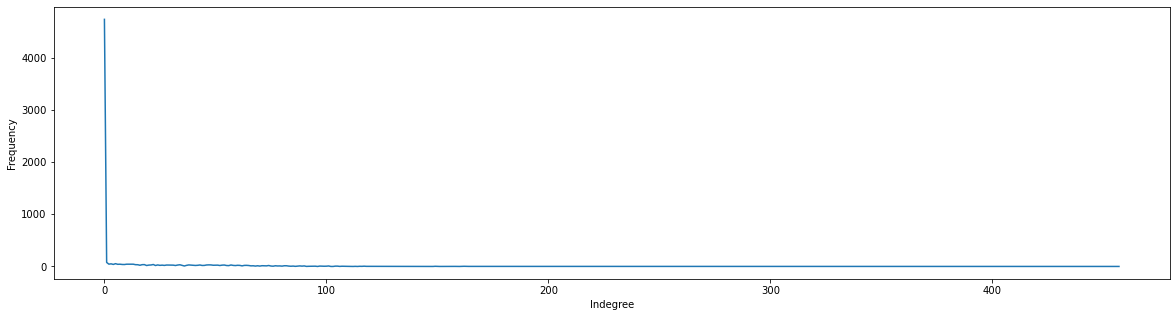

In [35]:
# Plotting in-degree distribution
plt.figure(figsize=(20,5))
plt.plot(df_indegree_sorted['Indegree'], df_indegree_sorted['freq'])
plt.xlabel('Indegree')
plt.ylabel('Frequency')

In [36]:
# The highest frequency vs the outdegree at which it occurs
df_outdegree_sorted_new = df_outdegree.sort_values(by='freq', ascending=False)
df_outdegree_sorted_new

,Outdegree,freq
38,1,2382
237,0,1005
20,2,704
58,3,401
32,4,279
...,...,...
147,599,1
145,472,1
142,399,1
139,305,1


Text(0, 0.5, 'Frequency')

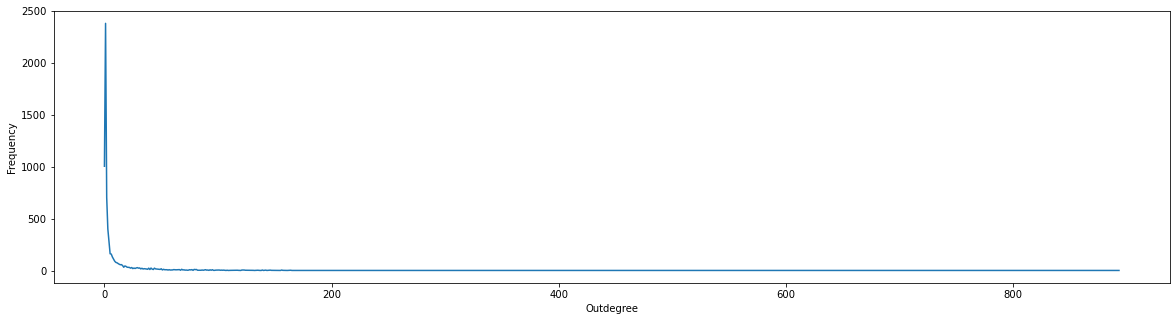

In [37]:
# Plotting out-degree distribution
plt.figure(figsize=(20,5))
plt.plot(df_outdegree_sorted['Outdegree'], df_outdegree_sorted['freq'])
plt.xlabel('Outdegree')
plt.ylabel('Frequency')

### Question 2. Calculate the local clustering coefficient of each node and plot the clustering-coefficient distribution (lcc vs frequency of lcc) of the network.

In [38]:
#  local clustering coefficient for node i can be calculated as :
# C(i)  = |{e(jk) : v(j), v(k) ∈ N(i), e(jk)∈ E}|/(deg(i) * (deg(i) - 1))

#function to calculate local clustering coefficient for a node

def local_clustering_coefficient(adj_matrix, node):
    
# The neighbors of the input node can be calculated by finding all non-zero entries in the row of the adjacency matrix 
# corresponding to that node.    
    
    neighbors = np.where(adj_matrix[node, :] == 1)[0]
    
# local clustering coefficient for nodes with 0 or 1 neighbor is 0.0

    if len(neighbors) <= 1:
        return 0.0
    
    num_triangles = 0
    
#  counting the number of triangles that involve the given node
    
    for neighbor in neighbors:
        
#  neighbor_of_neighbor are neighboring nodes of the nodes that are present in the neighbours node set

        for neighbor_of_neighbor in np.where(adj_matrix[neighbor, :] == 1)[0]:
            if neighbor_of_neighbor in neighbors:
                num_triangles += 1
    return num_triangles / (len(neighbors) * (len(neighbors) - 1))

#initializing array local_clustering_coeff with 0s

local_clustering_coeff = np.zeros((n_nodes))

#calling function to calculate local_clustering_coefficient for each node

for node in range(ad_matrix.shape[0]):
    print(f"Local clustering coefficient of node {inv_map[node]}: {local_clustering_coefficient(ad_matrix, node)}")
    local_clustering_coeff[node] = local_clustering_coefficient(ad_matrix, node)
    

Local clustering coefficient of node 30: 0.05
Local clustering coefficient of node 3: 0.07509881422924901
Local clustering coefficient of node 25: 0.10074906367041199
Local clustering coefficient of node 4: 0.13669950738916256
Local clustering coefficient of node 5: 0.191699604743083
Local clustering coefficient of node 6: 0.030659391432531737
Local clustering coefficient of node 7: 0.09239130434782608
Local clustering coefficient of node 8: 0.04319713435735535
Local clustering coefficient of node 9: 0.05416666666666667
Local clustering coefficient of node 10: 0.06757865937072503
Local clustering coefficient of node 11: 0.02612160941473519
Local clustering coefficient of node 12: 0.051201923076923075
Local clustering coefficient of node 13: 0.11818181818181818
Local clustering coefficient of node 14: 0.030740568234746156
Local clustering coefficient of node 15: 0.06693877551020408
Local clustering coefficient of node 16: 0.11904761904761904
Local clustering coefficient of node 17: 0.08

Local clustering coefficient of node 172: 0.08443289350926296
Local clustering coefficient of node 175: 0.0
Local clustering coefficient of node 173: 0.038175900451349554
Local clustering coefficient of node 174: 0.0
Local clustering coefficient of node 74: 0.08631713554987212
Local clustering coefficient of node 176: 0.08771929824561403
Local clustering coefficient of node 177: 0.02631578947368421
Local clustering coefficient of node 178: 0.03942652329749104
Local clustering coefficient of node 179: 0.07352941176470588
Local clustering coefficient of node 180: 0.0296995108315863
Local clustering coefficient of node 181: 0.0
Local clustering coefficient of node 182: 0.062479714378448556
Local clustering coefficient of node 166: 0.044296400187003274
Local clustering coefficient of node 185: 0.0
Local clustering coefficient of node 194: 0.0
Local clustering coefficient of node 187: 0.06606606606606606
Local clustering coefficient of node 188: 0.0
Local clustering coefficient of node 32: 

Local clustering coefficient of node 405: 0.029239766081871343
Local clustering coefficient of node 406: 0.059714795008912656
Local clustering coefficient of node 407: 0.04056513409961686
Local clustering coefficient of node 408: 0.0
Local clustering coefficient of node 409: 0.0
Local clustering coefficient of node 410: 0.13333333333333333
Local clustering coefficient of node 411: 0.0
Local clustering coefficient of node 413: 0.0
Local clustering coefficient of node 415: 0.08333333333333333
Local clustering coefficient of node 414: 0.16666666666666666
Local clustering coefficient of node 325: 0.058333333333333334
Local clustering coefficient of node 416: 0.0
Local clustering coefficient of node 417: 0.08333333333333333
Local clustering coefficient of node 418: 0.0
Local clustering coefficient of node 427: 0.1
Local clustering coefficient of node 423: 0.14285714285714285
Local clustering coefficient of node 424: 0.1
Local clustering coefficient of node 425: 0.03992210321324245
Local clu

Local clustering coefficient of node 626: 0.1032258064516129
Local clustering coefficient of node 628: 0.0
Local clustering coefficient of node 632: 0.0
Local clustering coefficient of node 633: 0.08316498316498316
Local clustering coefficient of node 634: 0.04782997762863535
Local clustering coefficient of node 646: 0.014705882352941176
Local clustering coefficient of node 635: 0.05990675990675991
Local clustering coefficient of node 636: 0.10909090909090909
Local clustering coefficient of node 647: 0.06350806451612903
Local clustering coefficient of node 637: 0.13666666666666666
Local clustering coefficient of node 638: 0.0
Local clustering coefficient of node 640: 0.08333333333333333
Local clustering coefficient of node 641: 0.0
Local clustering coefficient of node 642: 0.16666666666666666
Local clustering coefficient of node 648: 0.0
Local clustering coefficient of node 643: 0.042995169082125605
Local clustering coefficient of node 644: 0.05982905982905983
Local clustering coeffici

Local clustering coefficient of node 823: 0.11428571428571428
Local clustering coefficient of node 824: 0.0
Local clustering coefficient of node 826: 0.044840652934317916
Local clustering coefficient of node 825: 0.07261640798226164
Local clustering coefficient of node 830: 0.16666666666666666
Local clustering coefficient of node 832: 0.0
Local clustering coefficient of node 831: 0.09090909090909091
Local clustering coefficient of node 835: 0.0
Local clustering coefficient of node 836: 0.10615384615384615
Local clustering coefficient of node 837: 0.0
Local clustering coefficient of node 838: 0.03571428571428571
Local clustering coefficient of node 841: 0.03633879781420765
Local clustering coefficient of node 840: 0.16666666666666666
Local clustering coefficient of node 844: 0.05
Local clustering coefficient of node 842: 0.10459770114942529
Local clustering coefficient of node 843: 0.0
Local clustering coefficient of node 845: 0.0
Local clustering coefficient of node 847: 0.0
Local clus

Local clustering coefficient of node 1027: 0.3333333333333333
Local clustering coefficient of node 1028: 0.047619047619047616
Local clustering coefficient of node 1029: 0.06285240464344942
Local clustering coefficient of node 1031: 0.11695906432748537
Local clustering coefficient of node 1032: 0.07354925775978408
Local clustering coefficient of node 1033: 0.3
Local clustering coefficient of node 1034: 0.07954545454545454
Local clustering coefficient of node 1035: 0.022727272727272728
Local clustering coefficient of node 1039: 0.16666666666666666
Local clustering coefficient of node 1037: 0.05595075239398085
Local clustering coefficient of node 1038: 0.2
Local clustering coefficient of node 1040: 0.0
Local clustering coefficient of node 1041: 0.04124149659863945
Local clustering coefficient of node 1042: 0.043292682926829265
Local clustering coefficient of node 1043: 0.06190476190476191
Local clustering coefficient of node 1044: 0.1111111111111111
Local clustering coefficient of node 10

Local clustering coefficient of node 1210: 0.04851393057963049
Local clustering coefficient of node 1211: 0.0691333982473223
Local clustering coefficient of node 1212: 0.16666666666666666
Local clustering coefficient of node 1213: 0.0
Local clustering coefficient of node 1214: 1.0
Local clustering coefficient of node 1215: 0.06346153846153846
Local clustering coefficient of node 1216: 0.0
Local clustering coefficient of node 1219: 0.0
Local clustering coefficient of node 1221: 0.04015721120984279
Local clustering coefficient of node 1223: 0.0
Local clustering coefficient of node 1224: 0.0
Local clustering coefficient of node 1225: 0.0
Local clustering coefficient of node 1226: 0.0
Local clustering coefficient of node 1227: 0.0
Local clustering coefficient of node 1228: 0.1
Local clustering coefficient of node 1229: 0.0
Local clustering coefficient of node 1230: 0.12215909090909091
Local clustering coefficient of node 1231: 0.0
Local clustering coefficient of node 1232: 0.0
Local cluste

Local clustering coefficient of node 1419: 0.054878048780487805
Local clustering coefficient of node 1421: 0.0
Local clustering coefficient of node 1422: 0.0
Local clustering coefficient of node 1423: 0.03571428571428571
Local clustering coefficient of node 1424: 0.0969079939668175
Local clustering coefficient of node 1426: 0.0
Local clustering coefficient of node 1427: 0.5
Local clustering coefficient of node 1428: 0.05044136191677175
Local clustering coefficient of node 1429: 0.3333333333333333
Local clustering coefficient of node 1430: 0.5
Local clustering coefficient of node 1431: 0.0
Local clustering coefficient of node 1433: 0.0
Local clustering coefficient of node 1434: 0.0
Local clustering coefficient of node 1436: 0.0
Local clustering coefficient of node 1184: 0.06572541382667965
Local clustering coefficient of node 1438: 0.0
Local clustering coefficient of node 1440: 0.0
Local clustering coefficient of node 1439: 0.25
Local clustering coefficient of node 1441: 0.0878048780487

Local clustering coefficient of node 1622: 0.13387755102040816
Local clustering coefficient of node 1623: 0.06072874493927125
Local clustering coefficient of node 1625: 0.0
Local clustering coefficient of node 1627: 0.0
Local clustering coefficient of node 1626: 0.0
Local clustering coefficient of node 1628: 0.06818181818181818
Local clustering coefficient of node 1630: 0.5
Local clustering coefficient of node 1631: 0.13333333333333333
Local clustering coefficient of node 1632: 0.16666666666666666
Local clustering coefficient of node 1634: 0.0
Local clustering coefficient of node 1635: 0.0
Local clustering coefficient of node 1636: 0.0
Local clustering coefficient of node 1638: 0.0
Local clustering coefficient of node 1637: 0.0
Local clustering coefficient of node 1639: 0.05555555555555555
Local clustering coefficient of node 1641: 0.0
Local clustering coefficient of node 1642: 0.0
Local clustering coefficient of node 1643: 0.0
Local clustering coefficient of node 1644: 0.0651595744680

Local clustering coefficient of node 1816: 0.1111111111111111
Local clustering coefficient of node 1820: 0.11897627965043696
Local clustering coefficient of node 1821: 0.0
Local clustering coefficient of node 1822: 0.19090909090909092
Local clustering coefficient of node 1823: 0.0429421768707483
Local clustering coefficient of node 1825: 0.0
Local clustering coefficient of node 1826: 0.0
Local clustering coefficient of node 1827: 0.0
Local clustering coefficient of node 347: 0.07142857142857142
Local clustering coefficient of node 1835: 0.0684931506849315
Local clustering coefficient of node 1836: 0.2875
Local clustering coefficient of node 1828: 0.0
Local clustering coefficient of node 1837: 0.10449735449735449
Local clustering coefficient of node 1829: 0.0
Local clustering coefficient of node 1838: 0.05419799498746867
Local clustering coefficient of node 1830: 0.3333333333333333
Local clustering coefficient of node 1831: 0.3333333333333333
Local clustering coefficient of node 1832: 0

Local clustering coefficient of node 2077: 0.0
Local clustering coefficient of node 2081: 0.0
Local clustering coefficient of node 2082: 0.0
Local clustering coefficient of node 2083: 0.0
Local clustering coefficient of node 2095: 0.03333333333333333
Local clustering coefficient of node 2084: 0.15555555555555556
Local clustering coefficient of node 2085: 0.10714285714285714
Local clustering coefficient of node 2086: 0.0
Local clustering coefficient of node 2087: 0.0
Local clustering coefficient of node 2088: 0.23333333333333334
Local clustering coefficient of node 2089: 0.0
Local clustering coefficient of node 2090: 0.0
Local clustering coefficient of node 2091: 0.16071428571428573
Local clustering coefficient of node 2092: 0.19047619047619047
Local clustering coefficient of node 2093: 0.07508417508417509
Local clustering coefficient of node 2096: 0.0
Local clustering coefficient of node 2097: 0.0
Local clustering coefficient of node 2100: 0.0
Local clustering coefficient of node 2099:

Local clustering coefficient of node 2297: 0.0818868771509801
Local clustering coefficient of node 2298: 0.07934397163120567
Local clustering coefficient of node 2299: 0.09814563545906829
Local clustering coefficient of node 2300: 0.0
Local clustering coefficient of node 2301: 0.0
Local clustering coefficient of node 2302: 0.0
Local clustering coefficient of node 2304: 0.0
Local clustering coefficient of node 2307: 0.19047619047619047
Local clustering coefficient of node 2308: 0.0
Local clustering coefficient of node 2310: 0.0
Local clustering coefficient of node 2311: 0.0
Local clustering coefficient of node 2312: 0.0
Local clustering coefficient of node 2313: 0.0
Local clustering coefficient of node 2314: 0.16666666666666666
Local clustering coefficient of node 2315: 0.0
Local clustering coefficient of node 2309: 0.16666666666666666
Local clustering coefficient of node 2316: 0.0
Local clustering coefficient of node 2317: 0.0
Local clustering coefficient of node 2318: 0.0
Local cluste

Local clustering coefficient of node 2500: 0.0
Local clustering coefficient of node 2502: 0.10919540229885058
Local clustering coefficient of node 2503: 0.0
Local clustering coefficient of node 2504: 0.07333333333333333
Local clustering coefficient of node 2505: 0.0
Local clustering coefficient of node 2506: 0.0647342995169082
Local clustering coefficient of node 2507: 0.08354646206308611
Local clustering coefficient of node 2508: 0.11538461538461539
Local clustering coefficient of node 2509: 0.07272727272727272
Local clustering coefficient of node 2510: 0.13410886742756803
Local clustering coefficient of node 2511: 0.08928571428571429
Local clustering coefficient of node 2517: 0.15
Local clustering coefficient of node 2512: 0.0
Local clustering coefficient of node 2514: 0.0
Local clustering coefficient of node 2513: 0.0
Local clustering coefficient of node 2515: 0.0
Local clustering coefficient of node 2516: 0.04492600422832981
Local clustering coefficient of node 2518: 0.166666666666

Local clustering coefficient of node 2702: 0.06392405063291139
Local clustering coefficient of node 2703: 0.12595628415300547
Local clustering coefficient of node 2688: 0.040460942130467394
Local clustering coefficient of node 2704: 0.06198198198198198
Local clustering coefficient of node 2660: 0.0653897950022445
Local clustering coefficient of node 2689: 0.06258890469416785
Local clustering coefficient of node 2667: 0.06698412698412698
Local clustering coefficient of node 2690: 0.11692307692307692
Local clustering coefficient of node 2691: 0.1569767441860465
Local clustering coefficient of node 2692: 0.14619883040935672
Local clustering coefficient of node 2693: 0.07137674587339017
Local clustering coefficient of node 2705: 0.0
Local clustering coefficient of node 2706: 0.13398692810457516
Local clustering coefficient of node 2694: 0.16013071895424835
Local clustering coefficient of node 2695: 0.21428571428571427
Local clustering coefficient of node 2696: 0.14484126984126985
Local clu

Local clustering coefficient of node 2904: 0.21568627450980393
Local clustering coefficient of node 2906: 0.23333333333333334
Local clustering coefficient of node 2907: 0.06666666666666667
Local clustering coefficient of node 2908: 0.06060606060606061
Local clustering coefficient of node 2909: 0.1181077694235589
Local clustering coefficient of node 2912: 0.14204545454545456
Local clustering coefficient of node 2913: 0.11818181818181818
Local clustering coefficient of node 2916: 0.0
Local clustering coefficient of node 2917: 0.0
Local clustering coefficient of node 2918: 0.3333333333333333
Local clustering coefficient of node 2919: 0.5
Local clustering coefficient of node 2921: 0.0
Local clustering coefficient of node 2923: 0.1949579831932773
Local clustering coefficient of node 2924: 0.0
Local clustering coefficient of node 2925: 0.08187134502923976
Local clustering coefficient of node 2928: 0.0
Local clustering coefficient of node 2929: 0.0
Local clustering coefficient of node 2930: 0

Local clustering coefficient of node 3109: 0.20833333333333334
Local clustering coefficient of node 3110: 0.1261904761904762
Local clustering coefficient of node 3111: 0.0
Local clustering coefficient of node 3112: 0.0
Local clustering coefficient of node 3113: 0.0
Local clustering coefficient of node 2003: 0.06656426011264721
Local clustering coefficient of node 3114: 0.0
Local clustering coefficient of node 3115: 0.3
Local clustering coefficient of node 3118: 0.5
Local clustering coefficient of node 3119: 0.0
Local clustering coefficient of node 3120: 0.05357142857142857
Local clustering coefficient of node 3123: 0.3333333333333333
Local clustering coefficient of node 3124: 0.0
Local clustering coefficient of node 3125: 0.25
Local clustering coefficient of node 3126: 0.0
Local clustering coefficient of node 3127: 0.2
Local clustering coefficient of node 3128: 0.0
Local clustering coefficient of node 3129: 0.0
Local clustering coefficient of node 3131: 0.0
Local clustering coefficient

Local clustering coefficient of node 3348: 0.058333333333333334
Local clustering coefficient of node 3349: 0.041666666666666664
Local clustering coefficient of node 3350: 0.1505050505050505
Local clustering coefficient of node 3352: 0.06901799181210946
Local clustering coefficient of node 3353: 0.0
Local clustering coefficient of node 3354: 0.2
Local clustering coefficient of node 3355: 0.3333333333333333
Local clustering coefficient of node 3360: 0.0
Local clustering coefficient of node 3356: 0.0
Local clustering coefficient of node 3357: 0.0
Local clustering coefficient of node 3358: 0.0
Local clustering coefficient of node 3359: 0.0
Local clustering coefficient of node 3306: 0.047619047619047616
Local clustering coefficient of node 3361: 0.5
Local clustering coefficient of node 3362: 0.0
Local clustering coefficient of node 3368: 0.0
Local clustering coefficient of node 3369: 0.0
Local clustering coefficient of node 3370: 0.0
Local clustering coefficient of node 3366: 0.065540194572

Local clustering coefficient of node 3568: 0.0774391948560246
Local clustering coefficient of node 3569: 0.15331010452961671
Local clustering coefficient of node 3576: 0.25
Local clustering coefficient of node 3577: 0.0
Local clustering coefficient of node 3579: 0.0
Local clustering coefficient of node 3578: 0.0
Local clustering coefficient of node 3587: 0.06190476190476191
Local clustering coefficient of node 3581: 0.0
Local clustering coefficient of node 3582: 0.0
Local clustering coefficient of node 3583: 0.16666666666666666
Local clustering coefficient of node 3584: 0.0
Local clustering coefficient of node 3585: 0.0
Local clustering coefficient of node 3586: 0.07510339123242349
Local clustering coefficient of node 3589: 0.3
Local clustering coefficient of node 3528: 0.24358974358974358
Local clustering coefficient of node 3591: 0.25
Local clustering coefficient of node 3590: 0.0
Local clustering coefficient of node 3593: 0.03230769230769231
Local clustering coefficient of node 3594

Local clustering coefficient of node 3786: 0.055967841682127394
Local clustering coefficient of node 2975: 0.0
Local clustering coefficient of node 3791: 0.0
Local clustering coefficient of node 3787: 0.055269443200477684
Local clustering coefficient of node 3792: 0.0641025641025641
Local clustering coefficient of node 3796: 0.08873261694058154
Local clustering coefficient of node 3795: 0.0
Local clustering coefficient of node 3794: 0.11884057971014493
Local clustering coefficient of node 3798: 0.08893280632411067
Local clustering coefficient of node 3799: 0.3
Local clustering coefficient of node 3800: 0.8333333333333334
Local clustering coefficient of node 3803: 0.011111111111111112
Local clustering coefficient of node 3801: 0.0
Local clustering coefficient of node 3802: 0.07142857142857142
Local clustering coefficient of node 3804: 0.05
Local clustering coefficient of node 3805: 0.0
Local clustering coefficient of node 3806: 0.09191919191919191
Local clustering coefficient of node 38

Local clustering coefficient of node 4042: 0.1595238095238095
Local clustering coefficient of node 2981: 0.10570824524312897
Local clustering coefficient of node 4044: 0.06601123595505617
Local clustering coefficient of node 4045: 0.04822774805447471
Local clustering coefficient of node 4046: 0.05656281920326864
Local clustering coefficient of node 4048: 0.0
Local clustering coefficient of node 4051: 0.0
Local clustering coefficient of node 4050: 0.0
Local clustering coefficient of node 4053: 0.0
Local clustering coefficient of node 4055: 0.16666666666666666
Local clustering coefficient of node 4056: 0.07509881422924901
Local clustering coefficient of node 4057: 0.0
Local clustering coefficient of node 4059: 0.0
Local clustering coefficient of node 4061: 0.0
Local clustering coefficient of node 4062: 0.16666666666666666
Local clustering coefficient of node 4063: 0.13532763532763534
Local clustering coefficient of node 4077: 0.10628844839371156
Local clustering coefficient of node 4078:

Local clustering coefficient of node 4331: 0.0
Local clustering coefficient of node 4338: 0.06794871794871794
Local clustering coefficient of node 4333: 0.5
Local clustering coefficient of node 4334: 0.0
Local clustering coefficient of node 4335: 0.08064516129032258
Local clustering coefficient of node 4336: 0.0
Local clustering coefficient of node 4337: 0.0
Local clustering coefficient of node 4345: 0.0
Local clustering coefficient of node 4346: 0.0
Local clustering coefficient of node 4340: 0.0
Local clustering coefficient of node 4342: 0.011111111111111112
Local clustering coefficient of node 4341: 0.0
Local clustering coefficient of node 4343: 0.0
Local clustering coefficient of node 4347: 0.015488215488215488
Local clustering coefficient of node 4344: 0.0
Local clustering coefficient of node 4348: 0.0
Local clustering coefficient of node 4351: 0.16666666666666666
Local clustering coefficient of node 4352: 0.0
Local clustering coefficient of node 4353: 0.07943037974683544
Local clu

Local clustering coefficient of node 4564: 0.20265151515151514
Local clustering coefficient of node 4565: 0.5
Local clustering coefficient of node 4566: 0.0
Local clustering coefficient of node 4567: 0.5
Local clustering coefficient of node 4568: 0.0
Local clustering coefficient of node 4569: 0.0
Local clustering coefficient of node 4574: 0.07371794871794872
Local clustering coefficient of node 4575: 0.0
Local clustering coefficient of node 4576: 0.13333333333333333
Local clustering coefficient of node 4577: 0.5
Local clustering coefficient of node 4581: 0.0
Local clustering coefficient of node 4582: 0.05
Local clustering coefficient of node 4586: 0.125
Local clustering coefficient of node 4587: 0.10398860398860399
Local clustering coefficient of node 4588: 0.18181818181818182
Local clustering coefficient of node 4592: 0.0
Local clustering coefficient of node 4593: 0.0
Local clustering coefficient of node 4594: 0.0
Local clustering coefficient of node 4595: 0.3333333333333333
Local clu

Local clustering coefficient of node 4844: 1.0
Local clustering coefficient of node 4859: 0.11264367816091954
Local clustering coefficient of node 4860: 0.0
Local clustering coefficient of node 4845: 0.0
Local clustering coefficient of node 4846: 0.13101604278074866
Local clustering coefficient of node 4847: 0.0
Local clustering coefficient of node 4848: 0.0
Local clustering coefficient of node 4849: 1.0
Local clustering coefficient of node 4850: 0.5
Local clustering coefficient of node 4861: 0.0
Local clustering coefficient of node 4862: 0.08333333333333333
Local clustering coefficient of node 4851: 0.8333333333333334
Local clustering coefficient of node 4852: 0.5
Local clustering coefficient of node 4863: 0.0
Local clustering coefficient of node 4853: 0.2
Local clustering coefficient of node 4854: 1.0
Local clustering coefficient of node 4855: 0.5
Local clustering coefficient of node 4856: 0.0
Local clustering coefficient of node 4866: 0.0
Local clustering coefficient of node 4867: 0

Local clustering coefficient of node 5065: 0.0
Local clustering coefficient of node 5069: 0.1
Local clustering coefficient of node 5067: 0.0
Local clustering coefficient of node 5068: 0.08888888888888889
Local clustering coefficient of node 5071: 0.0
Local clustering coefficient of node 5072: 0.16666666666666666
Local clustering coefficient of node 5077: 0.0
Local clustering coefficient of node 5078: 0.0
Local clustering coefficient of node 5079: 0.061814951482848164
Local clustering coefficient of node 5080: 0.0
Local clustering coefficient of node 5081: 0.0
Local clustering coefficient of node 5084: 0.0
Local clustering coefficient of node 5085: 0.0
Local clustering coefficient of node 5086: 0.0
Local clustering coefficient of node 5087: 0.0
Local clustering coefficient of node 5088: 0.0
Local clustering coefficient of node 5089: 0.05357142857142857
Local clustering coefficient of node 5090: 0.0
Local clustering coefficient of node 5091: 0.0
Local clustering coefficient of node 5095:

Local clustering coefficient of node 5404: 0.06987179487179487
Local clustering coefficient of node 5397: 0.0
Local clustering coefficient of node 5398: 0.0
Local clustering coefficient of node 5405: 0.16666666666666666
Local clustering coefficient of node 5399: 0.2857142857142857
Local clustering coefficient of node 5400: 0.0
Local clustering coefficient of node 5401: 0.0
Local clustering coefficient of node 5406: 0.0
Local clustering coefficient of node 5413: 0.0
Local clustering coefficient of node 5415: 0.0
Local clustering coefficient of node 5416: 0.0
Local clustering coefficient of node 5423: 0.057624113475177305
Local clustering coefficient of node 5418: 0.0
Local clustering coefficient of node 5424: 0.0
Local clustering coefficient of node 5419: 0.013888888888888888
Local clustering coefficient of node 5421: 0.0
Local clustering coefficient of node 5422: 0.0
Local clustering coefficient of node 5430: 0.06666666666666667
Local clustering coefficient of node 5427: 0.109609609609

Local clustering coefficient of node 5692: 0.15714285714285714
Local clustering coefficient of node 5695: 0.0
Local clustering coefficient of node 5698: 0.0
Local clustering coefficient of node 5696: 0.052244897959183675
Local clustering coefficient of node 5697: 0.059426618568445035
Local clustering coefficient of node 5702: 0.06666666666666667
Local clustering coefficient of node 5703: 0.0
Local clustering coefficient of node 5705: 0.0
Local clustering coefficient of node 5704: 0.08333333333333333
Local clustering coefficient of node 5708: 0.3333333333333333
Local clustering coefficient of node 5707: 0.16666666666666666
Local clustering coefficient of node 5709: 0.045454545454545456
Local clustering coefficient of node 5710: 0.0
Local clustering coefficient of node 5711: 0.0
Local clustering coefficient of node 5712: 0.0
Local clustering coefficient of node 5713: 0.0
Local clustering coefficient of node 5714: 0.07822410147991543
Local clustering coefficient of node 5717: 0.0
Local cl

Local clustering coefficient of node 5970: 0.0
Local clustering coefficient of node 5972: 0.0
Local clustering coefficient of node 5980: 0.03571428571428571
Local clustering coefficient of node 5981: 0.23333333333333334
Local clustering coefficient of node 5982: 0.16666666666666666
Local clustering coefficient of node 5983: 0.0
Local clustering coefficient of node 5984: 0.2222222222222222
Local clustering coefficient of node 5985: 0.0
Local clustering coefficient of node 5986: 0.0
Local clustering coefficient of node 5987: 0.0
Local clustering coefficient of node 5988: 0.0
Local clustering coefficient of node 5989: 0.0
Local clustering coefficient of node 5990: 0.0
Local clustering coefficient of node 5992: 0.0
Local clustering coefficient of node 5993: 0.3333333333333333
Local clustering coefficient of node 5997: 0.0
Local clustering coefficient of node 5998: 0.09737654320987654
Local clustering coefficient of node 5967: 0.0
Local clustering coefficient of node 5999: 0.086842105263157

Local clustering coefficient of node 6222: 0.0
Local clustering coefficient of node 6223: 0.058823529411764705
Local clustering coefficient of node 6229: 0.07309941520467836
Local clustering coefficient of node 6227: 0.5
Local clustering coefficient of node 6230: 0.0
Local clustering coefficient of node 6228: 0.0
Local clustering coefficient of node 6232: 0.0
Local clustering coefficient of node 6236: 0.0
Local clustering coefficient of node 6239: 0.05
Local clustering coefficient of node 6240: 0.0
Local clustering coefficient of node 6241: 0.06846846846846846
Local clustering coefficient of node 6242: 0.2
Local clustering coefficient of node 6244: 0.0
Local clustering coefficient of node 6245: 0.08928571428571429
Local clustering coefficient of node 6243: 0.12857142857142856
Local clustering coefficient of node 6247: 0.0
Local clustering coefficient of node 6248: 0.044444444444444446
Local clustering coefficient of node 6252: 0.0
Local clustering coefficient of node 6253: 0.0
Local cl

Local clustering coefficient of node 6507: 0.0
Local clustering coefficient of node 6508: 0.0
Local clustering coefficient of node 6509: 0.0
Local clustering coefficient of node 6510: 0.07127882599580712
Local clustering coefficient of node 6513: 0.0
Local clustering coefficient of node 6514: 0.0
Local clustering coefficient of node 6515: 0.0
Local clustering coefficient of node 6516: 0.0
Local clustering coefficient of node 6517: 0.5
Local clustering coefficient of node 6518: 0.13920454545454544
Local clustering coefficient of node 6519: 0.0
Local clustering coefficient of node 6520: 0.0
Local clustering coefficient of node 6521: 0.0
Local clustering coefficient of node 6522: 0.04556650246305419
Local clustering coefficient of node 6523: 0.18087121212121213
Local clustering coefficient of node 6524: 0.05357142857142857
Local clustering coefficient of node 6525: 0.125
Local clustering coefficient of node 6526: 0.07272727272727272
Local clustering coefficient of node 6527: 0.0
Local clu

Local clustering coefficient of node 6775: 0.3333333333333333
Local clustering coefficient of node 6773: 0.0
Local clustering coefficient of node 6774: 0.1956521739130435
Local clustering coefficient of node 6779: 0.16666666666666666
Local clustering coefficient of node 6780: 0.03333333333333333
Local clustering coefficient of node 6781: 0.08928571428571429
Local clustering coefficient of node 6782: 0.0
Local clustering coefficient of node 6783: 0.16666666666666666
Local clustering coefficient of node 6784: 0.08130081300813008
Local clustering coefficient of node 6787: 0.0
Local clustering coefficient of node 6789: 0.12727272727272726
Local clustering coefficient of node 6790: 0.2545454545454545
Local clustering coefficient of node 6793: 0.0
Local clustering coefficient of node 6794: 0.0
Local clustering coefficient of node 6795: 0.0
Local clustering coefficient of node 6797: 0.0
Local clustering coefficient of node 6798: 0.0
Local clustering coefficient of node 6800: 0.0
Local cluster

Local clustering coefficient of node 7055: 0.06543235851041447
Local clustering coefficient of node 7048: 0.0
Local clustering coefficient of node 7056: 0.08633633633633633
Local clustering coefficient of node 7049: 0.04700854700854701
Local clustering coefficient of node 7057: 0.09807330146313196
Local clustering coefficient of node 7030: 0.5
Local clustering coefficient of node 7061: 0.5
Local clustering coefficient of node 7062: 0.16666666666666666
Local clustering coefficient of node 7063: 0.275
Local clustering coefficient of node 7064: 0.3333333333333333
Local clustering coefficient of node 7065: 0.0
Local clustering coefficient of node 7038: 0.16666666666666666
Local clustering coefficient of node 7072: 0.0
Local clustering coefficient of node 7070: 0.0
Local clustering coefficient of node 7071: 0.08333333333333333
Local clustering coefficient of node 7079: 0.0
Local clustering coefficient of node 7080: 0.0650103519668737
Local clustering coefficient of node 7082: 0.0
Local clus

Local clustering coefficient of node 7428: 0.0
Local clustering coefficient of node 7429: 0.0
Local clustering coefficient of node 7430: 0.0
Local clustering coefficient of node 7431: 0.0
Local clustering coefficient of node 7441: 0.0
Local clustering coefficient of node 7443: 0.36666666666666664
Local clustering coefficient of node 7444: 0.0
Local clustering coefficient of node 6139: 0.0
Local clustering coefficient of node 7448: 0.0
Local clustering coefficient of node 7445: 0.0
Local clustering coefficient of node 7446: 0.0
Local clustering coefficient of node 7447: 0.0
Local clustering coefficient of node 7449: 0.022941970310391364
Local clustering coefficient of node 7451: 0.0
Local clustering coefficient of node 7452: 0.5
Local clustering coefficient of node 7453: 0.0
Local clustering coefficient of node 7181: 0.5
Local clustering coefficient of node 7180: 0.3333333333333333
Local clustering coefficient of node 7454: 0.0
Local clustering coefficient of node 7455: 0.08333333333333

Local clustering coefficient of node 7810: 0.041666666666666664
Local clustering coefficient of node 7812: 0.16666666666666666
Local clustering coefficient of node 7814: 0.0
Local clustering coefficient of node 7815: 0.5
Local clustering coefficient of node 7818: 0.017786561264822136
Local clustering coefficient of node 7821: 0.0
Local clustering coefficient of node 7822: 0.0
Local clustering coefficient of node 6709: 0.0
Local clustering coefficient of node 7826: 0.0
Local clustering coefficient of node 7827: 0.0
Local clustering coefficient of node 7828: 0.0
Local clustering coefficient of node 7829: 0.16666666666666666
Local clustering coefficient of node 7830: 0.0
Local clustering coefficient of node 7831: 0.5
Local clustering coefficient of node 7832: 0.0
Local clustering coefficient of node 7833: 0.3333333333333333
Local clustering coefficient of node 7834: 0.0
Local clustering coefficient of node 7836: 0.0
Local clustering coefficient of node 7835: 0.3333333333333333
Local clust

Local clustering coefficient of node 8251: 0.0
Local clustering coefficient of node 8252: 0.0
Local clustering coefficient of node 8253: 0.0
Local clustering coefficient of node 8254: 0.0
Local clustering coefficient of node 8255: 0.0
Local clustering coefficient of node 8256: 0.0
Local clustering coefficient of node 8260: 0.0
Local clustering coefficient of node 8261: 0.0
Local clustering coefficient of node 8262: 0.0
Local clustering coefficient of node 8263: 0.0
Local clustering coefficient of node 8264: 0.0
Local clustering coefficient of node 8265: 0.0
Local clustering coefficient of node 8266: 0.0
Local clustering coefficient of node 7637: 0.0
Local clustering coefficient of node 8270: 0.0
Local clustering coefficient of node 8271: 0.0
Local clustering coefficient of node 8272: 0.0
Local clustering coefficient of node 8273: 0.0
Local clustering coefficient of node 8150: 0.0
Local clustering coefficient of node 8274: 0.0
Local clustering coefficient of node 1412: 0.0
Local cluster

Local clustering coefficient of node 4254: 0.0
Local clustering coefficient of node 4311: 0.0
Local clustering coefficient of node 4620: 0.0
Local clustering coefficient of node 4648: 0.0
Local clustering coefficient of node 4677: 0.0
Local clustering coefficient of node 4946: 0.0
Local clustering coefficient of node 5044: 0.0
Local clustering coefficient of node 5635: 0.0
Local clustering coefficient of node 5977: 0.0
Local clustering coefficient of node 6226: 0.0
Local clustering coefficient of node 3266: 0.0
Local clustering coefficient of node 3893: 0.0
Local clustering coefficient of node 6164: 0.0
Local clustering coefficient of node 3193: 0.0
Local clustering coefficient of node 3138: 0.0
Local clustering coefficient of node 2956: 0.0
Local clustering coefficient of node 3867: 0.0
Local clustering coefficient of node 3237: 0.0
Local clustering coefficient of node 2679: 0.0
Local clustering coefficient of node 3080: 0.0
Local clustering coefficient of node 4809: 0.0
Local cluster

### Plotting clustering-coefficient distribution

In [39]:
# creating dataframe with local_clustering_coeff values vs their corresponding frequencies

coeff_freq = np.array(find_unique_counts_arr(local_clustering_coeff))
df_local_clustering_coeff = pd.DataFrame(coeff_freq)

df_local_clustering_coeff.columns = ['local_clustering_coeff', 'freq']
df_local_clustering_coeff_sorted = df_local_clustering_coeff.sort_values(by='local_clustering_coeff', ascending=False)


In [40]:
# The highest frequency vs the local_clustering_coeff at which it occurs
df_local_clustering_coeff_new = df_local_clustering_coeff.sort_values(by='freq', ascending=False)
df_local_clustering_coeff_new

,local_clustering_coeff,freq
21,0.000000,4297.0
112,0.166667,184.0
55,0.500000,177.0
36,0.083333,80.0
78,0.333333,79.0
...,...,...
521,0.046612,1.0
522,0.118976,1.0
524,0.042942,1.0
525,0.068493,1.0


Text(0, 0.5, 'Frequency')

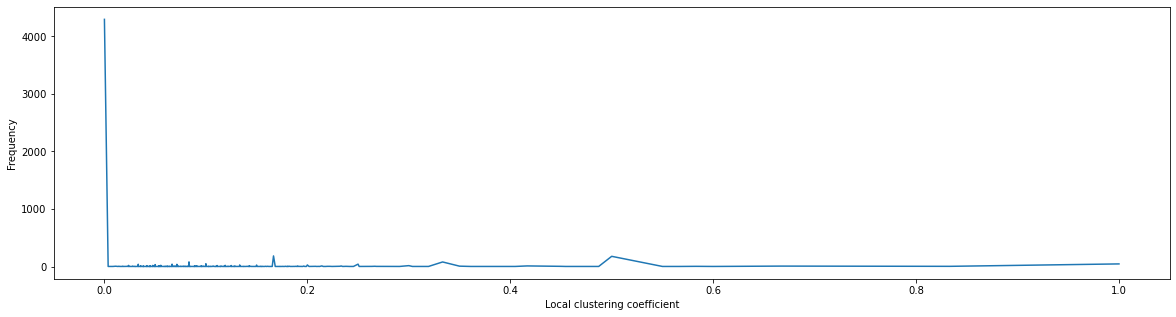

In [41]:
plt.figure(figsize=(20,5))
plt.plot(df_local_clustering_coeff_sorted['local_clustering_coeff'], df_local_clustering_coeff_sorted['freq'])
plt.xlabel('Local clustering coefficient')
plt.ylabel('Frequency')

# Question 2 : PageRank, Hubs and Authority

### 1. PageRank score for each node

In [42]:
import networkx as nx

# create directed graph
G = nx.DiGraph()
G.add_edges_from(edge_list)

In [43]:
# Computing the PageRank score of each node
PageRank_score = nx.pagerank(G)

# Print the PageRank score of each node
for node in PageRank_score:
    print(f"PageRank score of node {inv_map[node]}: {PageRank_score[node]}")

PageRank score of node 30: 0.00017349553934328362
PageRank score of node 1412: 0.0008141761230496596
PageRank score of node 3352: 0.0017851250122027215
PageRank score of node 5254: 0.0021500675059293235
PageRank score of node 5543: 0.0010508052619841281
PageRank score of node 7478: 0.0008124303526134783
PageRank score of node 3: 0.00020539498232448027
PageRank score of node 28: 0.0016986730322136937
PageRank score of node 39: 0.0003439790689580258
PageRank score of node 54: 0.0003476546497189804
PageRank score of node 108: 0.00043983711534545167
PageRank score of node 152: 0.0005817197428805893
PageRank score of node 178: 0.0002975848833195019
PageRank score of node 182: 0.00016083873728146711
PageRank score of node 214: 0.001659919966936546
PageRank score of node 271: 0.001334924091441659
PageRank score of node 286: 0.00017367757770305088
PageRank score of node 300: 0.00015065607046072738
PageRank score of node 348: 0.00017393564565284633
PageRank score of node 349: 9.460415271381965e

PageRank score of node 3023: 6.282366455332016e-05
PageRank score of node 874: 5.0487823458630175e-05
PageRank score of node 876: 5.0487823458630175e-05
PageRank score of node 877: 5.0487823458630175e-05
PageRank score of node 879: 5.0487823458630175e-05
PageRank score of node 3745: 0.00011617716694041356
PageRank score of node 4359: 6.39311952349173e-05
PageRank score of node 4550: 5.76676015917185e-05
PageRank score of node 880: 5.0487823458630175e-05
PageRank score of node 883: 5.0487823458630175e-05
PageRank score of node 886: 5.0487823458630175e-05
PageRank score of node 888: 5.0487823458630175e-05
PageRank score of node 889: 5.0487823458630175e-05
PageRank score of node 890: 5.0487823458630175e-05
PageRank score of node 891: 5.0487823458630175e-05
PageRank score of node 892: 5.0487823458630175e-05
PageRank score of node 469: 5.0487823458630175e-05
PageRank score of node 898: 5.0487823458630175e-05
PageRank score of node 900: 5.0487823458630175e-05
PageRank score of node 1323: 0.0

PageRank score of node 4333: 5.0487823458630175e-05
PageRank score of node 4334: 5.0487823458630175e-05
PageRank score of node 4336: 5.0487823458630175e-05
PageRank score of node 4337: 5.0487823458630175e-05
PageRank score of node 4345: 5.0487823458630175e-05
PageRank score of node 4346: 5.0487823458630175e-05
PageRank score of node 4340: 5.0487823458630175e-05
PageRank score of node 4342: 5.0487823458630175e-05
PageRank score of node 4343: 5.0487823458630175e-05
PageRank score of node 4347: 5.0487823458630175e-05
PageRank score of node 7952: 9.634406514041495e-05
PageRank score of node 8090: 8.346453395323609e-05
PageRank score of node 4344: 5.0487823458630175e-05
PageRank score of node 4348: 5.0487823458630175e-05
PageRank score of node 4352: 5.0487823458630175e-05
PageRank score of node 4353: 5.0487823458630175e-05
PageRank score of node 4354: 5.0487823458630175e-05
PageRank score of node 4357: 5.0487823458630175e-05
PageRank score of node 4358: 5.0487823458630175e-05
PageRank score

PageRank score of node 8069: 5.0487823458630175e-05
PageRank score of node 8070: 5.0487823458630175e-05
PageRank score of node 8071: 5.0487823458630175e-05
PageRank score of node 8072: 5.0487823458630175e-05
PageRank score of node 8074: 5.0487823458630175e-05
PageRank score of node 8076: 0.00013651540108583173
PageRank score of node 8075: 5.0487823458630175e-05
PageRank score of node 8077: 5.0487823458630175e-05
PageRank score of node 8080: 5.0487823458630175e-05
PageRank score of node 8081: 5.0487823458630175e-05
PageRank score of node 8023: 5.0487823458630175e-05
PageRank score of node 8084: 5.0487823458630175e-05
PageRank score of node 8085: 5.0487823458630175e-05
PageRank score of node 8086: 5.0487823458630175e-05
PageRank score of node 8087: 5.0487823458630175e-05
PageRank score of node 8088: 5.0487823458630175e-05
PageRank score of node 8089: 7.199471786543057e-05
PageRank score of node 8091: 5.0487823458630175e-05
PageRank score of node 8092: 5.0487823458630175e-05
PageRank scor

### 2. Authority and Hub score for each node

In [44]:
# computing Authority and Hub scores for each node
Authority_score, Hub_score = nx.hits(G)

# printing the Authority and Hub scores for each node
for node in G.nodes():
    print(f"Node {inv_map[node]}: Authority score = {Authority_score[node]}, Hub score = {Hub_score[node]}")

Node 30: Authority score = 7.925509536499254e-05, Hub score = 9.508954836855905e-05
Node 1412: Authority score = 0.0, Hub score = 0.00012172939865316845
Node 3352: Authority score = 0.0033814231063793564, Hub score = 0.002328415091537902
Node 5254: Authority score = 0.0003772096308658232, Hub score = 0.0018247396642980143
Node 5543: Authority score = 0.0013969722536770427, Hub score = 0.0012852668946906865
Node 7478: Authority score = 0.0, Hub score = 0.0007626588344311034
Node 3: Authority score = 4.021031640108498e-05, Hub score = 9.501171859429164e-05
Node 28: Authority score = 0.0003569336095454782, Hub score = 0.00025475061392999266
Node 39: Authority score = 0.00010662223574717072, Hub score = 6.132950504129257e-05
Node 54: Authority score = 2.526962060030596e-05, Hub score = 0.0001402071358783933
Node 108: Authority score = 2.5889831779624102e-06, Hub score = 4.840902380638934e-06
Node 152: Authority score = 5.9915578524252184e-05, Hub score = 0.00012871399188050248
Node 178: Au

Node 3301: Authority score = 0.0001731273701045212, Hub score = 0.0001330036548904114
Node 1013: Authority score = 0.00012353628965180706, Hub score = 0.0
Node 1016: Authority score = 2.4094755460420938e-08, Hub score = 0.0
Node 1017: Authority score = 2.4094755460420938e-08, Hub score = 0.0
Node 1019: Authority score = 2.4094755460420938e-08, Hub score = 0.0
Node 1009: Authority score = 0.0002754836094014263, Hub score = 0.0
Node 1021: Authority score = 1.606899255901749e-05, Hub score = 0.0
Node 1025: Authority score = 1.606899255901749e-05, Hub score = 0.0
Node 1027: Authority score = 1.579773232958611e-05, Hub score = 0.0
Node 1028: Authority score = 3.791147500489076e-05, Hub score = 0.0
Node 1033: Authority score = 2.5564462323290116e-05, Hub score = 0.0
Node 1037: Authority score = 0.0010311360023564531, Hub score = 0.0
Node 1040: Authority score = 1.0703756917791822e-06, Hub score = 0.0
Node 1041: Authority score = 0.0004959200326238401, Hub score = 0.0
Node 4127: Authority sco

Node 3642: Authority score = 0.003156068703535115, Hub score = 0.0
Node 6721: Authority score = 0.0, Hub score = 8.685227826299305e-05
Node 3649: Authority score = 1.3235817613613053e-05, Hub score = 0.0
Node 3647: Authority score = 0.0001723970741244214, Hub score = 0.0
Node 3651: Authority score = 2.4542576550397302e-05, Hub score = 0.0
Node 3652: Authority score = 2.4542576550397302e-05, Hub score = 0.0
Node 3654: Authority score = 1.3306348887598647e-05, Hub score = 0.0
Node 3653: Authority score = 2.7616193535295152e-05, Hub score = 0.0
Node 3655: Authority score = 0.00010913481010634269, Hub score = 0.0
Node 3656: Authority score = 3.6958284127945815e-05, Hub score = 0.0
Node 3657: Authority score = 1.4309844647696505e-05, Hub score = 0.0
Node 3658: Authority score = 0.0005524279892074389, Hub score = 0.0
Node 3659: Authority score = 0.00044360868922393065, Hub score = 0.0
Node 3662: Authority score = 0.000122028954605091, Hub score = 0.0
Node 3663: Authority score = 2.9186194670

Node 7856: Authority score = 3.719865883405699e-05, Hub score = 0.0
Node 7754: Authority score = 5.749011448946072e-06, Hub score = 0.0
Node 7863: Authority score = 9.783783630296304e-06, Hub score = 0.0
Node 7864: Authority score = 1.8882175261880404e-05, Hub score = 0.0
Node 7865: Authority score = 0.00016124311635103256, Hub score = 0.0
Node 7866: Authority score = 6.164967579518321e-06, Hub score = 0.0
Node 7867: Authority score = 5.195293017322174e-06, Hub score = 0.0
Node 7868: Authority score = 5.195293017322174e-06, Hub score = 0.0
Node 7870: Authority score = 5.195293017322174e-06, Hub score = 0.0
Node 7873: Authority score = 4.434467983562047e-05, Hub score = 0.0
Node 7875: Authority score = 7.71484874903275e-06, Hub score = 0.0
Node 7877: Authority score = 5.684595555685426e-05, Hub score = 0.0
Node 7878: Authority score = 4.546877416346007e-06, Hub score = 0.0
Node 7885: Authority score = 5.467503641005914e-05, Hub score = 0.0
Node 7883: Authority score = 5.552810065986172e

In [45]:
# # Authority score, Hub score and Page Rank of first 5 nodes

# Node 30: Authority score = 7.925509536499254e-05, Hub score = 9.508954836855905e-05, PageRank score of node 30: 0.00017349553934328362
# Node 1412: Authority score = 0.0, Hub score = 0.00012172939865316845, PageRank score of node 1412: 0.0008141761230496596
# Node 3352: Authority score = 0.0033814231063793564, Hub score = 0.002328415091537902, PageRank score of node 3352: 0.0017851250122027215
# Node 5254: Authority score = 0.0003772096308658232, Hub score = 0.0018247396642980143, PageRank score of node 5254: 0.0021500675059293235
# Node 5543: Authority score = 0.0013969722536770427, Hub score = 0.0012852668946906865, PageRank score of node 5543: 0.0010508052619841281


## Comparing the results obtained using Pagerank, Authority and Hub score

In [46]:
# graphs to compare Pagerank, Authority and Hub score

# Representing PageRank score in the form of a dataframe and sorting the values by node ID
a = np.array(list(PageRank_score.items()))
df_PageRank_score = pd.DataFrame(a)
df_PageRank_score.columns = ['node', 'PageRank_score']
df_PageRank_score_sorted = df_PageRank_score.sort_values(by='node')

# Representing Authority score in the form of a dataframe and sorting the values by node ID
b = np.array(list(Authority_score.items()))
df_Authority_score = pd.DataFrame(b)
df_Authority_score.columns = ['node', 'Authority_score']
df_Authority_score_sorted = df_Authority_score.sort_values(by='node')

# Representing Hub score in the form of a dataframe and sorting the values by node ID
c = np.array(list(Hub_score.items()))
df_Hub_score = pd.DataFrame(c)
df_Hub_score.columns = ['node', 'Hub_score']
df_Hub_score_sorted = df_Hub_score.sort_values(by='node')

Text(0, 0.5, 'PageRank score')

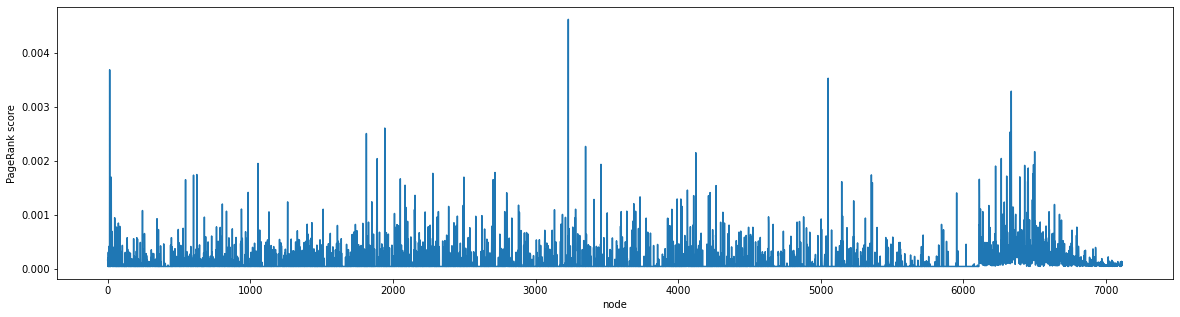

In [47]:
# plotting PageRank score of the nodes
plt.figure(figsize=(20,5))
plt.plot(df_PageRank_score_sorted['node'], df_PageRank_score_sorted['PageRank_score'])
plt.xlabel('node')
plt.ylabel('PageRank score')

Text(0, 0.5, 'Authority score')

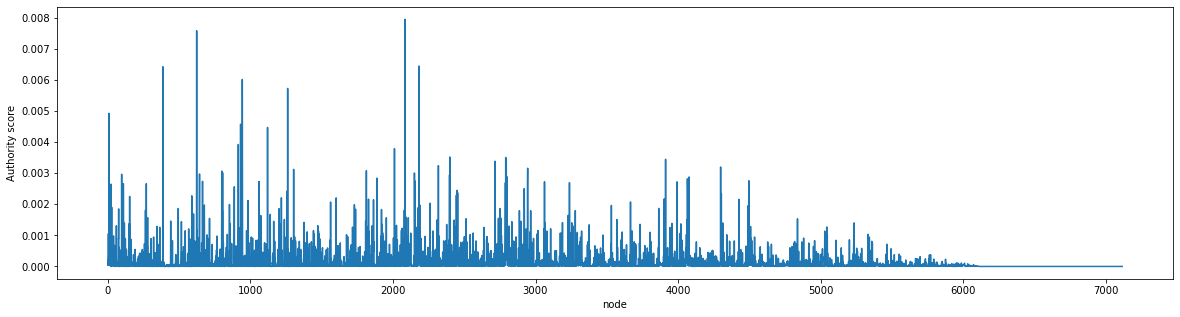

In [48]:
# plotting Authority score of the nodes
plt.figure(figsize=(20,5))
plt.plot(df_Authority_score_sorted['node'], df_Authority_score_sorted['Authority_score'], label = 'Authority score')
plt.xlabel('node')
plt.ylabel('Authority score')

Text(0, 0.5, 'Hub score')

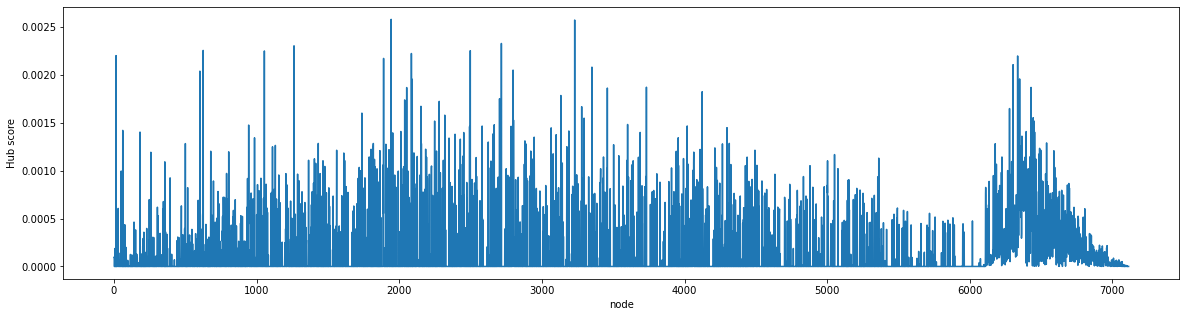

In [49]:
# plotting Hub score of the nodes
plt.figure(figsize=(20,5))
plt.plot(df_Hub_score_sorted['node'], df_Hub_score_sorted['Hub_score'], label = 'Hub score')
plt.xlabel('node')
plt.ylabel('Hub score')

In [50]:
# creating one dataframe concatenating the Page Rank, Authority and Hub score of all nodes
df1 = pd.concat([df_Hub_score_sorted['node'],df_PageRank_score_sorted['PageRank_score'], df_Authority_score_sorted['Authority_score'], df_Hub_score_sorted['Hub_score']],axis=1)
df1 =df1.reset_index(drop=True)

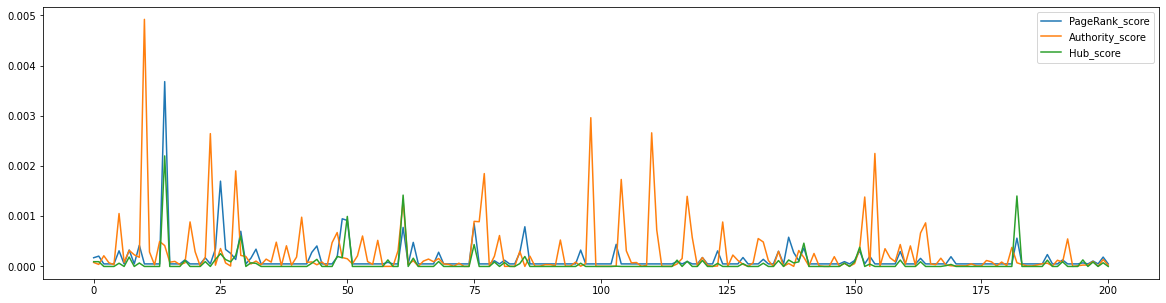

In [51]:
# plotting Page Rank, Authority and Hub score of first 200 nodes together
plt.figure(figsize=(20,5))
plt.plot(df1.loc[:200]['node'], df1.loc[:200]['PageRank_score'], label = 'PageRank_score')
plt.plot(df1.loc[:200]['node'], df1.loc[:200]['Authority_score'], label = 'Authority_score')
plt.plot(df1.loc[:200]['node'], df1.loc[:200]['Hub_score'], label ='Hub_score')
plt.legend()

In [52]:
# It can be seen that Page rank score and Hub score are directly related, that is, when one increases, the other increases
# as well. However, no clear relation can be seen between the Page rank score and Hub score and authority score.
# Hence, we can say that the authority score is not affected by the variations in Page rank score and Hub score.

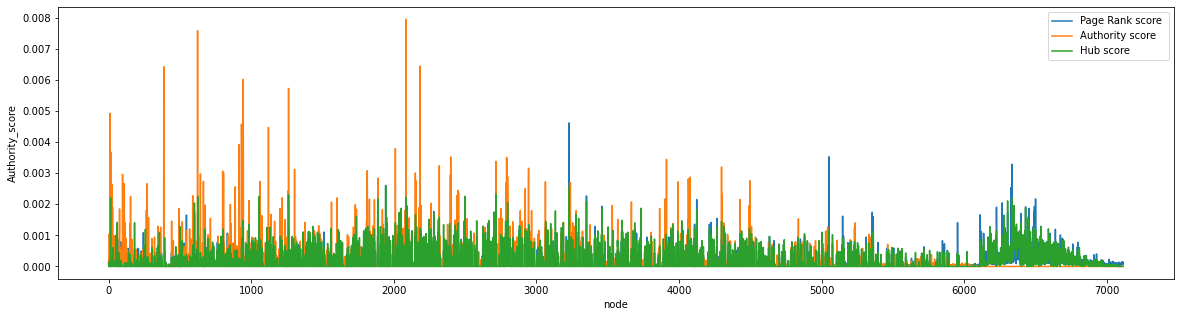

In [53]:
# plotting Page Rank, Authority and Hub score of the nodes together
plt.figure(figsize=(20,5))
plt.plot(df_PageRank_score_sorted['node'], df_PageRank_score_sorted['PageRank_score'], label = 'Page Rank score ')
plt.plot(df_Authority_score_sorted['node'], df_Authority_score_sorted['Authority_score'], label = 'Authority score')
plt.plot(df_Hub_score_sorted['node'], df_Hub_score_sorted['Hub_score'], label = 'Hub score')
plt.xlabel('node')
plt.ylabel('Authority_score')
plt.legend()

In [54]:
# Plotting Histograms

(array([6.716e+03, 3.040e+02, 5.800e+01, 2.500e+01, 5.000e+00, 3.000e+00,
        3.000e+00, 1.000e+00]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.004 ,
        0.005 ]),
 <a list of 8 Patch objects>)

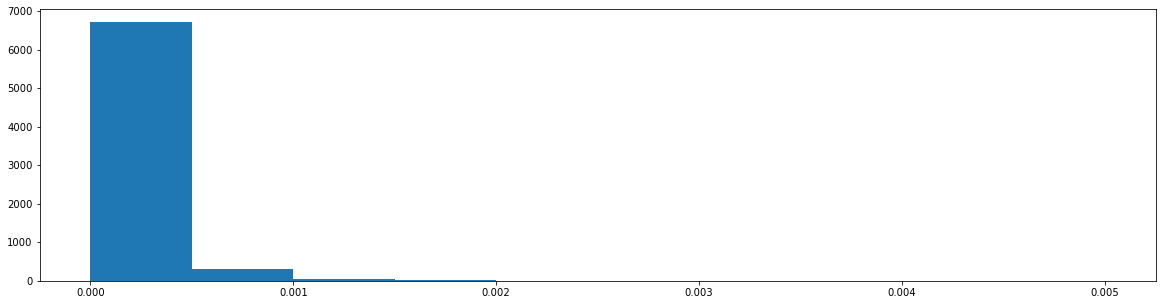

In [55]:
# plotting histogram for PageRank score

plt.figure(figsize =(20, 5))
plt.hist(df_PageRank_score_sorted['PageRank_score'], bins = [0, 0.0005, 0.001, 0.0015 , 0.002,0.0025, 0.003 , 0.004,0.005], label ="Page Rank")


(array([6.575e+03, 3.250e+02, 9.900e+01, 4.900e+01, 2.300e+01, 2.000e+01,
        1.500e+01, 3.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.004 ,
        0.005 , 0.006 , 0.007 , 0.008 , 0.009 ]),
 <a list of 12 Patch objects>)

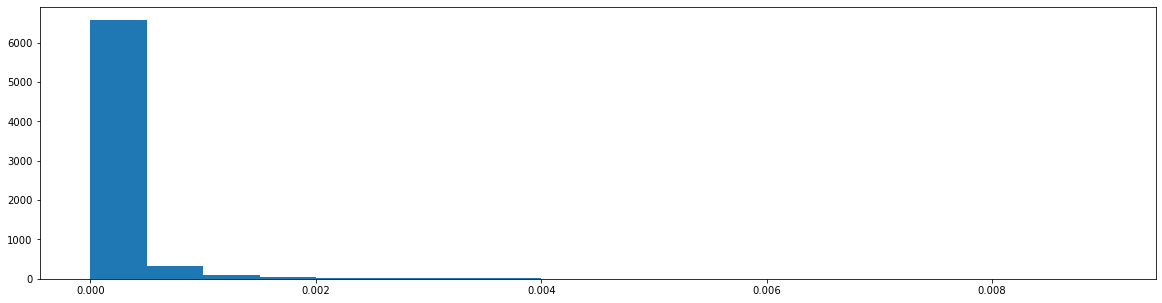

In [56]:
# plotting histogram for Authority score

plt.figure(figsize =(20, 5))
plt.hist(df_Authority_score_sorted['Authority_score'], bins = [0,0.0005,  0.001, 0.0015 , 0.002,0.0025 ,0.003 , 0.004,0.005,0.006,0.007,0.008,0.009],label ="Authority score")


(array([6.274e+03, 6.480e+02, 1.560e+02, 2.200e+01, 1.300e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.004 ,
        0.005 , 0.006 , 0.007 , 0.008 , 0.009 ]),
 <a list of 12 Patch objects>)

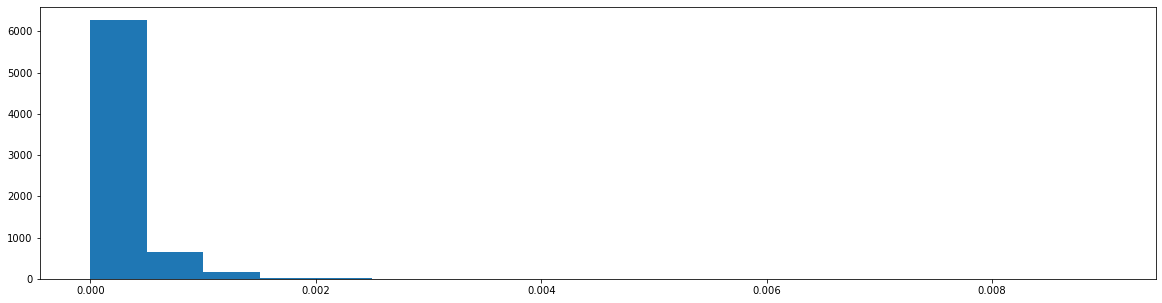

In [57]:
# plotting histogram for Hub score

fig, ax = plt.subplots(figsize =(20, 5))
plt.hist(df_Hub_score_sorted['Hub_score'], bins = [0,0.0005,  0.001, 0.0015 , 0.002,0.0025 ,0.003 , 0.004,0.005,0.006,0.007,0.008,0.009],label ="Authority score")


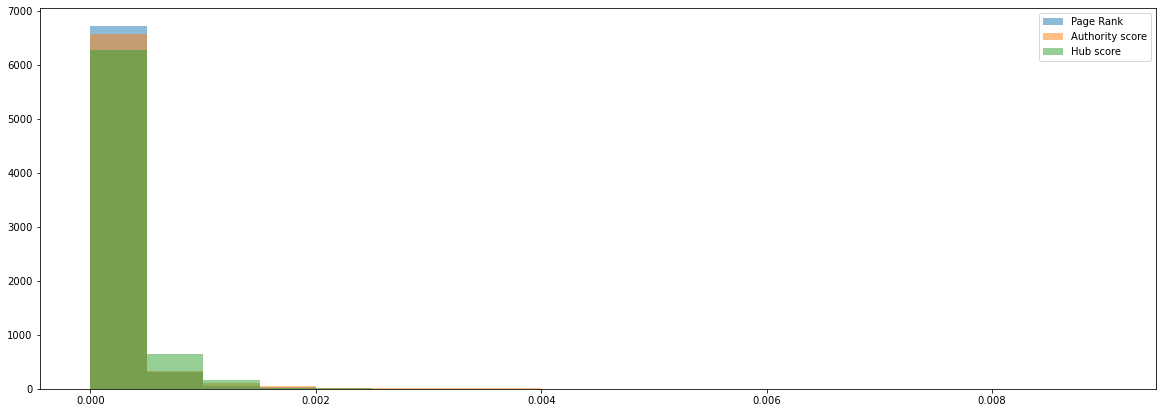

In [58]:
# Plotting multiple overlapping histograms for Page Rank, Authority and Hub score together
plt.figure(figsize =(20, 7))
plt.hist(df_PageRank_score_sorted['PageRank_score'], bins = [0, 0.0005, 0.001, 0.0015 , 0.002,0.0025, 0.003 , 0.004,0.005], alpha =0.5, label ="Page Rank")
plt.hist(df_Authority_score_sorted['Authority_score'], bins = [0,0.0005,  0.001, 0.0015 , 0.002,0.0025 ,0.003 , 0.004,0.005,0.006,0.007,0.008,0.009], alpha =0.5,label ="Authority score")
plt.hist(df_Hub_score_sorted['Hub_score'], bins = [0, 0.0005, 0.001,0.0015 , 0.002, 0.0025],alpha =0.5, label = 'Hub score')
plt.legend()

In [59]:
# It can also be seen that maximum Page Rank, Authority and Hub scores for nodes belong to the bin [0, 0.0005]. It suggests 
# that there are only a few nodes in the network that have high influence or importance. The majority of the nodes have low
# scores, indicating that they are not critical in the network's structure or information flow. Therefore, we can infer 
# that the network is highly centralized, with a few important nodes dominating the flow of information or influence.